# Data exploration

NLP applied to Kaggle dataset:
https://www.kaggle.com/datasets/stackoverflow/stacksample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

from ast import literal_eval

set_style("whitegrid")

## Read in the data and look at it

Only load in part of the 1.26 million questions. (All of them are too much for my laptop.)

In [3]:
questions = pd.read_csv("archive/questions_cleaned.csv", nrows=100000,
                        converters={'cleaned_body': literal_eval})

In [7]:
questions.sample(5, random_state=235)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body
72031,72031,72031,3192010,376057.0,2010-07-07T04:54:11Z,NaN,-1,SQL Server Row by Row operation,<p>I am trying to do some operation in column ...,I am trying to do some operation in column 'In...,"[try, operation, column, increment, base, prev..."
63464,63464,63464,2879030,151526.0,2010-05-21T01:22:16Z,NaN,0,Efficient implementation of threads in the giv...,<p>I've got a winforms application that is set...,I've got a winforms application that is set up...,"[get, winform, application, set, follow, manne..."
95482,95482,95482,4030000,452216.0,2010-10-27T04:36:56Z,NaN,0,CSS and JavaScript in ASP.NET MVC 2 Pages,<p>I have a master page that has two content s...,I have a master page that has two content sect...,"[master, page, content, section, like, leave, ..."
38732,38732,38732,1917190,84685.0,2009-12-16T19:49:48Z,NaN,2,Visual Studio 2010 with ASP.NET MVC1.0,<p>Is it possible to use Visual Studio 2010 to...,Is it possible to use Visual Studio 2010 to wr...,"[possible, use, Visual, Studio, 2010, write, c..."
84304,84304,84304,3634780,306766.0,2010-09-03T10:15:42Z,NaN,0,UIImageView ignores UIViewContentModeScaleToFill,<p>I have a UIImageView that I dynamically loa...,I have a UIImageView that I dynamically load w...,"[uiimageview, dynamically, load, image, mytabl..."


In [9]:
print(questions.iloc[63464].Body)

<p>I've got a winforms application that is set up in the following manner: 2 buttons, a textbox, an class object MX with a collection K as its member, function X and another function, Y.</p>

<ol>
<li>Function X parses a large database and enumerates some of its data in collection K.</li>
<li>Button 1 calls function X.</li>
<li>Function Y walks through the above collection and prints out the data in the textbox.</li>
<li>Button 2 calls function Y.</li>
</ol>

<p>I'd like to call function X through a worker thread in such a way that:</p>

<ol>
<li>The form remains responsive to user input. This comes intrinsically from the use of a separate thread.</li>
<li>There is never more than a single instance of function X running at any point in time.</li>
<li>MX/K can be accessed by both functions at all times.</li>
</ol>

<p>What would be the most efficient implementation of the above environment ?</p>



In [10]:
print(questions.iloc[63464].body_text)

I've got a winforms application that is set up in the following manner: 2 buttons, a textbox, an class object MX with a collection K as its member, function X and another function, Y.

Function X parses a large database and enumerates some of its data in collection K.
Button 1 calls function X.
Function Y walks through the above collection and prints out the data in the textbox.
Button 2 calls function Y.

I'd like to call function X through a worker thread in such a way that:

The form remains responsive to user input. This comes intrinsically from the use of a separate thread.
There is never more than a single instance of function X running at any point in time.
MX/K can be accessed by both functions at all times.

What would be the most efficient implementation of the above environment ?



In [11]:
print(questions.iloc[63464].cleaned_body)

['get', 'winform', 'application', 'set', 'follow', 'manner', '2', 'button', 'textbox', 'class', 'object', 'mx', 'collection', 'k', 'member', 'function', 'x', 'function', 'Y.', 'Function', 'X', 'parse', 'large', 'database', 'enumerate', 'datum', 'collection', 'K.', 'Button', '1', 'call', 'function', 'X.', 'Function', 'Y', 'walk', 'collection', 'print', 'datum', 'textbox', 'Button', '2', 'call', 'function', 'Y.', 'like', 'function', 'x', 'worker', 'thread', 'way', 'form', 'remain', 'responsive', 'user', 'input', 'come', 'intrinsically', 'use', 'separate', 'thread', 'single', 'instance', 'function', 'x', 'run', 'point', 'time', 'MX', 'K', 'access', 'function', 'time', 'efficient', 'implementation', 'environment']


## Confirm we actually read in as many rows as we thought, then count how many of those questions have been closed

In [12]:
np.shape(questions)[0]

100000

Since open questions have a 'NaN' in the 'ClosedDate' column, we can just count the number of 'NaN's to see how many questions are still open.

In [13]:
count = 0
for i in range(0,np.shape(questions)[0]):
    if pd.isna(questions.iloc[i].ClosedDate):
        count = count+1
        
print(count)

96669


Conversely, that means (total - open) is the number of closed questions.

In [16]:
np.shape(questions)[0] - count

3331

Seems like the majority of these questions are still open. (96.669% of them, in fact)

In [28]:
count/np.shape(questions)[0]

0.96669

## Start looking at the scores. How many of these questions have what score?

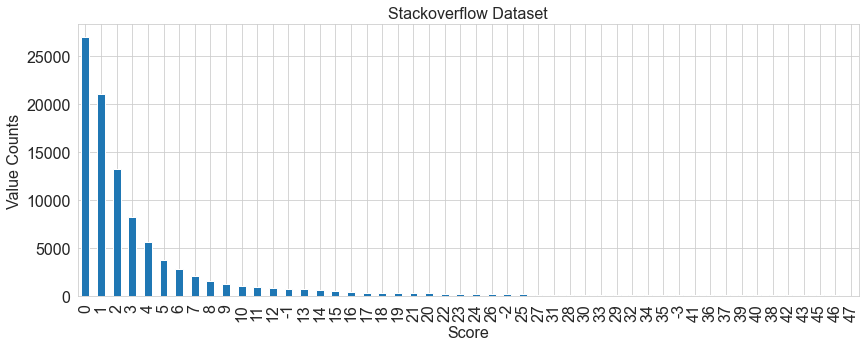

In [20]:
ax = questions['Score'].value_counts()[0:50].plot(kind='bar', figsize=(14,5), fontsize=16)
fig = ax.get_figure()
ax.set_title("Stackoverflow Dataset", fontsize=16)
ax.set_xlabel('Score', fontsize=16)
ax.set_ylabel('Value Counts', fontsize=16);

So the majority of these questions have pretty low scores (more than 25% of the dataset has a score of zero).

In [21]:
totals = questions['Score'].value_counts()

numbers = 0
for i in range(0,np.shape(totals)[0]):
    numbers = numbers + totals.iloc[i]

print(numbers)

100000


In [22]:
np.shape(totals)

(455,)

In [23]:
print(totals)

0       26976
1       21041
2       13268
3        8264
4        5592
        ...  
599         1
426         1
510         1
544         1
1567        1
Name: Score, Length: 455, dtype: int64


Notably, some of these questions have very high (outlier) scores. That means we should probably look at median scores moreso than mean scores.

## Find average score for this subset of data

In [24]:
print("Sum of scores for these questions is:", questions['Score'].sum())
print("Total number of questions is:", np.shape(questions)[0])
print("Number of unique score values is:", np.shape(totals)[0])

Sum of scores for these questions is: 698602
Total number of questions is: 100000
Number of unique score values is: 455


In [25]:
print("Mean of these scores is:", questions['Score'].mean())
print("Median of these scores is:", questions['Score'].median())

Mean of these scores is: 6.98602
Median of these scores is: 2.0


## Is there a connection between "closed" and "score"?

In [26]:
open_questions = questions[pd.isna(questions['ClosedDate'])].copy()
np.shape(open_questions)[0]

96669

In [27]:
closed_questions = questions[pd.notna(questions['ClosedDate'])].copy()
np.shape(closed_questions)[0]

3331

In [29]:
print("Sum of scores for these open questions is:", open_questions['Score'].sum())
print("Total number of open questions is:", np.shape(open_questions)[0])
print("Number of unique score values is:", np.shape(open_questions['Score'].value_counts())[0])
print("Mean of these open question scores is:", open_questions['Score'].mean())
print("Median of these open question scores is:", open_questions['Score'].median())

Sum of scores for these open questions is: 648052
Total number of open questions is: 96669
Number of unique score values is: 440
Mean of these open question scores is: 6.703824390445748
Median of these open question scores is: 2.0


In [30]:
print("Sum of scores for these closed questions is:", closed_questions['Score'].sum())
print("Total number of closed questions is:", np.shape(closed_questions)[0])
print("Number of unique score values is:", np.shape(closed_questions['Score'].value_counts())[0])
print("Mean of these closed question scores is:", closed_questions['Score'].mean())
print("Median of these closed question scores is:", closed_questions['Score'].median())

Sum of scores for these closed questions is: 50550
Total number of closed questions is: 3331
Number of unique score values is: 170
Mean of these closed question scores is: 15.17562293605524
Median of these closed question scores is: 4.0


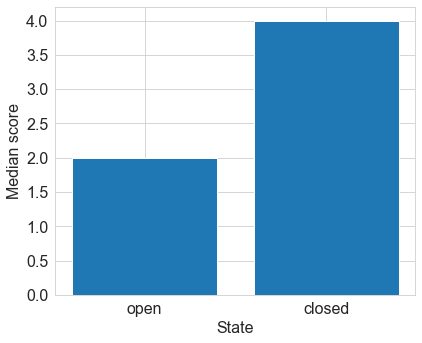

In [43]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])
status = ['open', 'closed']
values = [open_questions['Score'].median(),closed_questions['Score'].median()]
ax.bar(status, values)
ax.set_ylabel("Median score", fontsize=16)
ax.set_xlabel("State", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

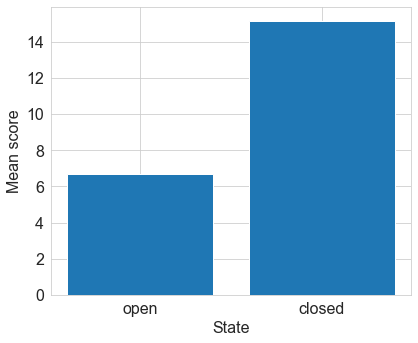

In [44]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0,0,1,1])
status = ['open', 'closed']
values = [open_questions['Score'].mean(),closed_questions['Score'].mean()]
ax.bar(status, values)
ax.set_ylabel("Mean score", fontsize=16)
ax.set_xlabel("State", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

So maybe there's a correlation between whether a question is closed/open and its score. That is, here at least, closed questions have both a higher median score and a higher mean score than open questions. Thus we should determine what properties of a question (the actual words) lead to a question becoming closed.

# Dependence on size of dataset

Given the overall size of this dataset (and the fact my laptop doesn't want to read in the whole csv), it would be worthwhile to check out how dependent the above observations are on the size of the dataset. Let's track ratio of open-to-closed questions and their respective means and medians for datasets ranging from 20,000 questions to 200,000 questions, by intervals of 20,000.

In [53]:
questions = pd.read_csv("archive/questions_cleaned.csv", nrows=200000,
                        converters={'cleaned_body': literal_eval})

In [95]:
lengths = 20000*np.arange(1,11)
num_open = np.zeros(len(lengths))
means_open = np.zeros(len(lengths))
medians_open = np.zeros(len(lengths))

num_closed = np.zeros(len(lengths))
means_closed = np.zeros(len(lengths))
medians_closed = np.zeros(len(lengths))


for i in range(0,len(lengths)):
    subset = questions[0:lengths[i]]
    
    open_questions = subset[pd.isna(subset['ClosedDate'])].copy()
    num_open[i] = np.shape(open_questions)[0]
    means_open[i] = open_questions['Score'].mean()
    medians_open[i] = open_questions['Score'].median()
    
    closed_questions = subset[pd.notna(subset['ClosedDate'])].copy()
    num_closed[i] = np.shape(closed_questions)[0]
    means_closed[i] = closed_questions['Score'].mean()
    medians_closed[i] = closed_questions['Score'].median()
    

## Plot information about open versus closed.

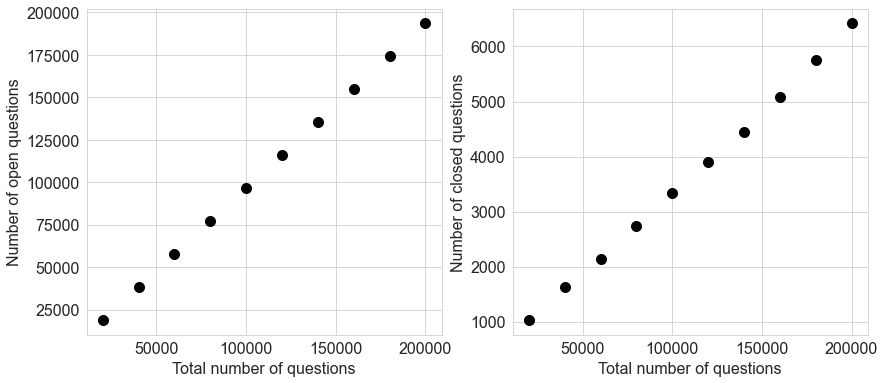

In [94]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14, 6))

axes[0].plot(lengths, num_open, marker="o", markersize=10, color='k', linestyle='none')

axes[0].set_xlabel("Total number of questions", fontsize=16)
axes[0].set_ylabel("Number of open questions", fontsize=16)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)


axes[1].plot(lengths, num_closed, marker="o", markersize=10, color='k', linestyle='none')

axes[1].set_xlabel("Total number of questions", fontsize=16)
axes[1].set_ylabel("Number of closed questions", fontsize=16)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)

plt.show()

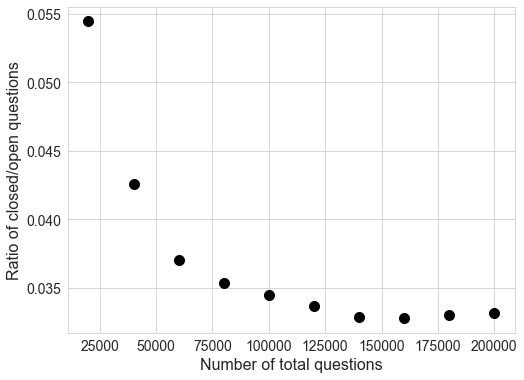

In [79]:
plt.figure(figsize=(8,6))

plt.plot(lengths, num_closed/num_open, marker="o", markersize=10, color='k', linestyle='none')

plt.xlabel("Total number of questions", fontsize=16)
plt.ylabel("Ratio of closed/open questions", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [80]:
print(num_closed/num_open)

[0.05446301 0.04256262 0.03702167 0.03534406 0.03445779 0.03366296
 0.03283683 0.03280445 0.03305192 0.03315925]


So while the number of open and closed questions increase steadily as the dataset is enlarged, the ratio of closed to open questions doesn't settle into a constant value until around 100,000 or more questions. That ratio is roughly 3.3%.

That ratio is slightly below what's reported on the Kaggle site for the whole csv file. There they report ~1.26 million total questions, of which ~56,000 are closed. So that would be more like 4.4%.

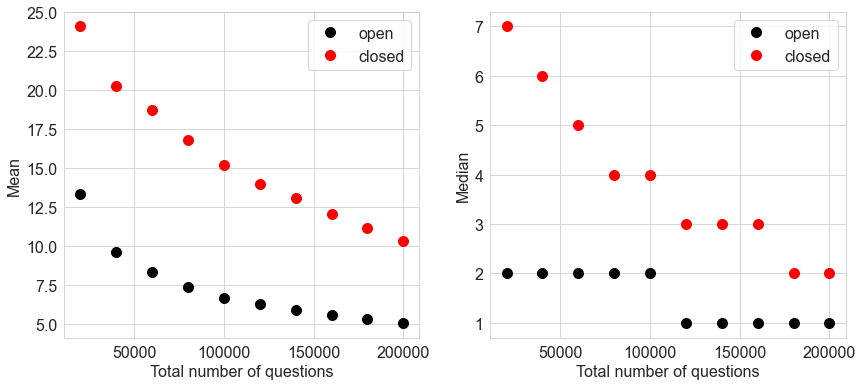

In [93]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14, 6))

axes[0].plot(lengths, means_open, marker="o", markersize=10, color='k', linestyle='none', label='open')
axes[0].plot(lengths, means_closed, marker="o", markersize=10, color='r', linestyle='none', label='closed')

axes[0].set_xlabel("Total number of questions", fontsize=16)
axes[0].set_ylabel("Mean", fontsize=16)
axes[0].legend(loc='upper right', fontsize=16)

axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)


axes[1].plot(lengths, medians_open, marker="o", markersize=10, color='k', linestyle='none', label='open')
axes[1].plot(lengths, medians_closed, marker="o", markersize=10, color='r', linestyle='none', label='closed')

axes[1].set_xlabel("Total number of questions", fontsize=16)
axes[1].set_ylabel("Median", fontsize=16)
axes[1].legend(loc='upper right', fontsize=16)

axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)

plt.show()

Regardless of the size of the dataset used, the observation that both the median score and the mean score for closed questions is higher than for open questions holds true.